Epoch 1/40
48/48 [==============================] - 2s 7ms/step - loss: 1.9376 - accuracy: 0.4129 - val_loss: 1.4502 - val_accuracy: 0.6683
Epoch 2/40
48/48 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.7954 - val_loss: 0.7159 - val_accuracy: 0.8283
Epoch 3/40
48/48 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8863 - val_loss: 0.5128 - val_accuracy: 0.8533
Epoch 4/40
48/48 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.9183 - val_loss: 0.4394 - val_accuracy: 0.8783
Epoch 5/40
48/48 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9396 - val_loss: 0.4031 - val_accuracy: 0.8867
Epoch 6/40
48/48 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9583 - val_loss: 0.3869 - val_accuracy: 0.8967
Epoch 7/40
48/48 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.9688 - val_loss: 0.3721 - val_accuracy: 0.8950
Epoch 8/40
48/48 [==

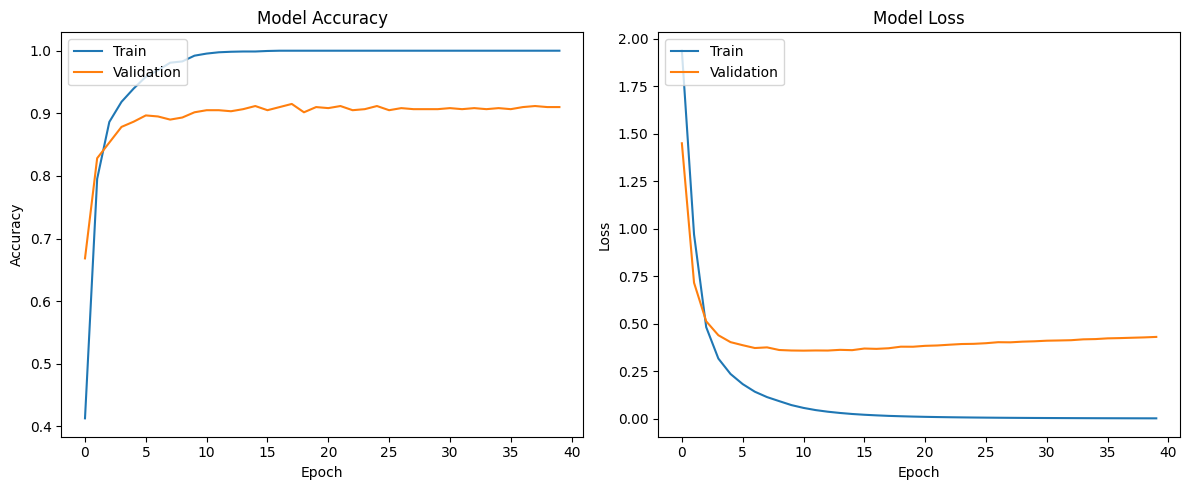

313/313 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.9228
Test Loss: 0.3373
Test Accuracy: 0.9228
313/313 [==============================] - 1s 2ms/step


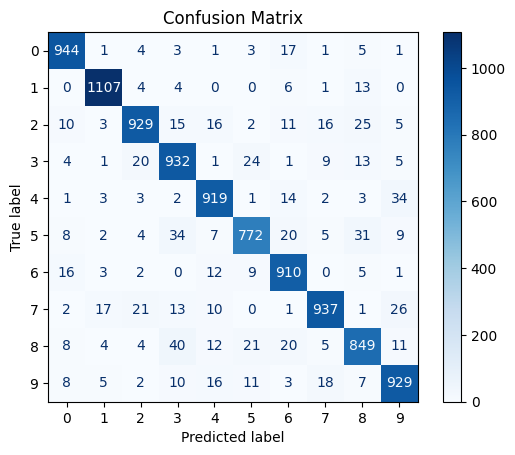

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images and normalize pixel values to the range [0, 1]
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Split the dataset into training and testing sets
X_train_split, _, y_train_split, _ = train_test_split(X_train_flat, y_train, test_size=0.95, random_state=42)

# Standardize the features after applying PCA
pca = PCA(n_components=50)  # Use the first 50 principal components for simplicity
X_train_pca = pca.fit_transform(X_train_split)
X_test_pca = pca.transform(X_test_flat)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for digit classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_split, epochs=40, batch_size=50, verbose=1, validation_split=0.2)

# Visualize training process (loss and accuracy)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Create a confusion matrix
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 32ms/step


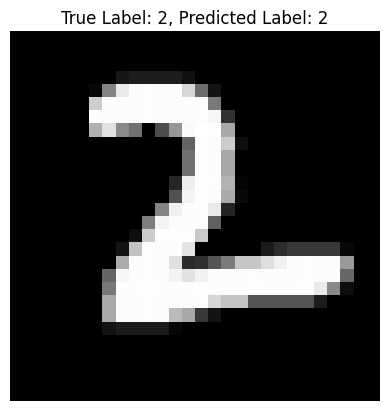

1/1 [==============================] - 0s 29ms/step


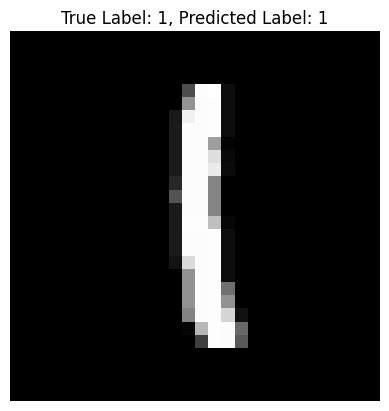

1/1 [==============================] - 0s 26ms/step


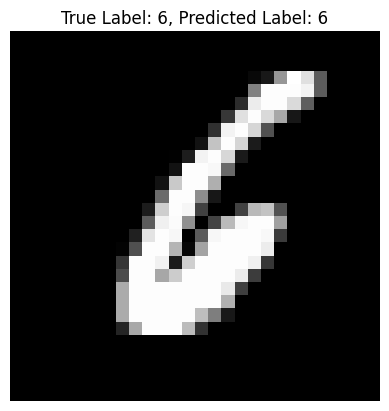

1/1 [==============================] - 0s 27ms/step


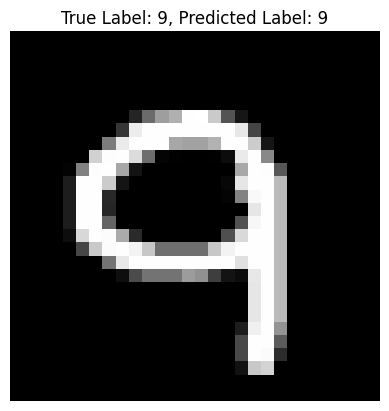

1/1 [==============================] - 0s 39ms/step


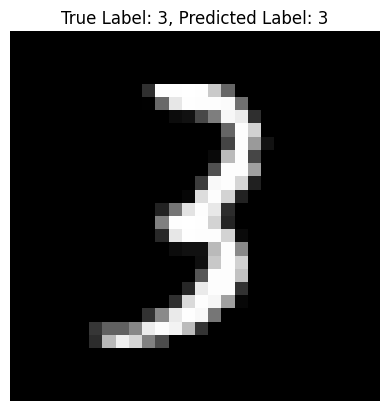

1/1 [==============================] - 0s 31ms/step


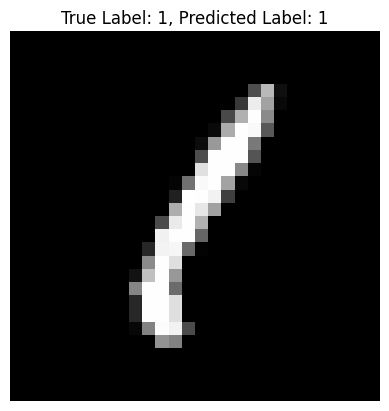

1/1 [==============================] - 0s 36ms/step


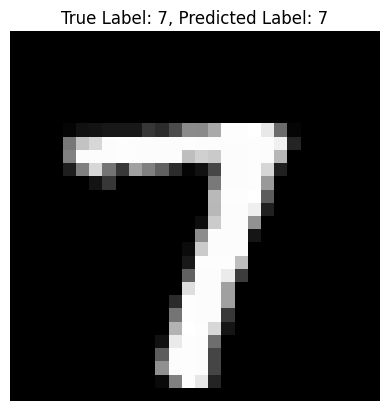

1/1 [==============================] - 0s 32ms/step


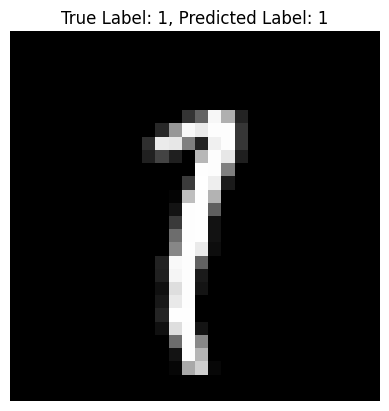

1/1 [==============================] - 0s 42ms/step


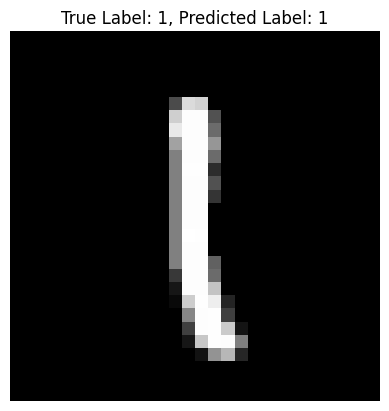

1/1 [==============================] - 0s 37ms/step


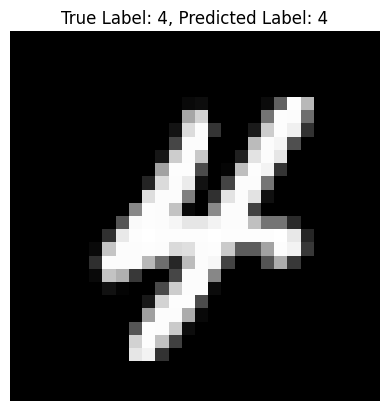

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(_, _), (X_test, y_test) = mnist.load_data()

# Flatten the images and normalize pixel values to the range [0, 1]
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Standardize the features after applying PCA
X_test_pca = pca.transform(X_test_flat)
X_test_scaled = scaler.transform(X_test_pca)

# Select random examples to verify
num_examples = 10
random_indices = np.random.choice(X_test.shape[0], num_examples, replace=False)

# Verify the model on selected examples
for idx in random_indices:
    example_image = X_test[idx]
    example_label = y_test[idx]

    # Reshape and preprocess the example for prediction
    example_flat = example_image.reshape(1, -1) / 255.0
    example_pca = pca.transform(example_flat)
    example_scaled = scaler.transform(example_pca)

    # Get the model's prediction
    predicted_label = np.argmax(model.predict(example_scaled))

    # Display the example image, true label, and predicted label
    plt.figure()
    plt.imshow(example_image, cmap='gray')
    plt.title(f'True Label: {example_label}, Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()
